# Introduction

In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams['figure.figsize']=(12,6)

In [222]:
import tensorflow

In [223]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [224]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

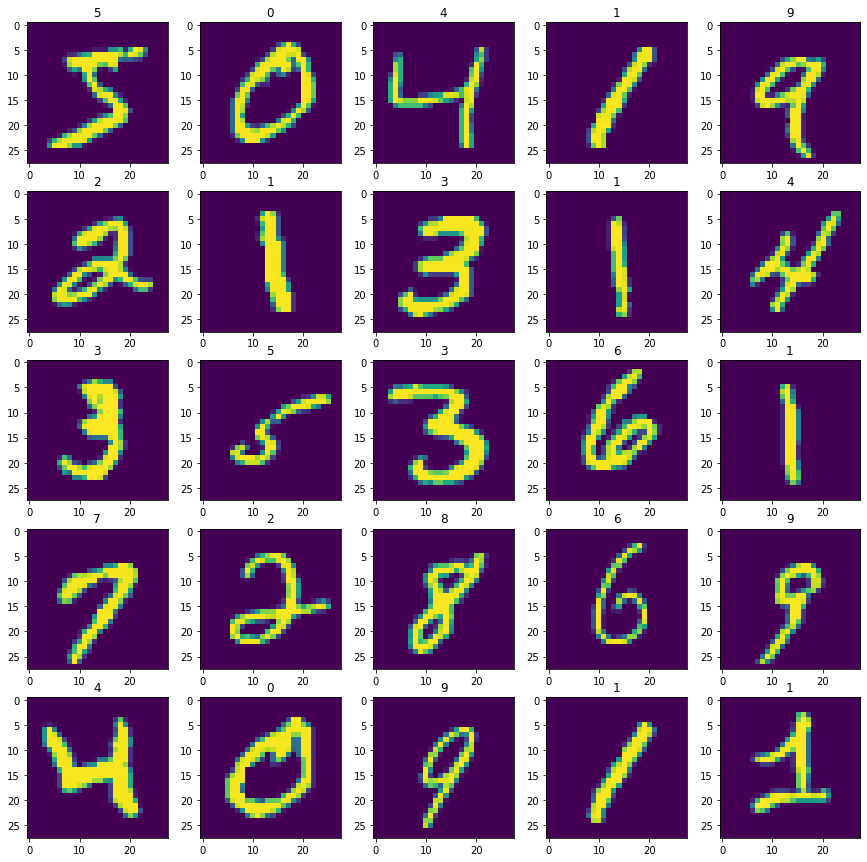

In [225]:
plt.figure(figsize=(15,15))
x,y=5,5
for i in range(25):
    plt.subplot(x,y,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])



In [226]:
x_train[0].shape

(28, 28)

In [227]:
x_train.shape[0]

60000

In [228]:
from tensorflow.keras import backend

In [229]:
y_train=tensorflow.keras.utils.to_categorical(y_train,10)
y_test=tensorflow.keras.utils.to_categorical(y_test,10)

In [230]:
    x_train=x_train.reshape(-1,28,28,1)
    x_test=x_test.reshape(-1,28,28,1)

In [231]:
# if backend.image_data_format =='channels_first':
#     x_train=x_train.reshape(-1,28,28,1)
#     x_test=x_test.reshape(-1,28,28,1)
#     input_shape=(28,28,1)

# Modelling

In [315]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,AveragePooling2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [327]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='swish', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='swish'))
model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())





model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [328]:
# model.add(Conv2D(filters = 64,kernel_size=(3,3), activation ='swish', input_shape = (28, 28, 1)))
# model.add(Conv2D(filters = 32,kernel_size=(3,3), activation ='swish'))


In [329]:
# model.add(AveragePooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

In [330]:
# model.add(Flatten())
# model.add(Dense(64, activation = "swish"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))

In [331]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [332]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_33 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_62 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
average_pooling2d_28 (Averag (None, 12, 12, 32)      

In [ ]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1399 - accuracy: 0.9577 - val_loss: 0.0398 - val_accuracy: 0.9870
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0672 - accuracy: 0.9807 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 3/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0461 - accuracy: 0.9864 - val_loss: 0.0209 - val_accuracy: 0.9927
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0389 - accuracy: 0.9887 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.0184 - val_accuracy: 0.9950
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0179 -

In [312]:
score=pd.DataFrame(model.history.history)

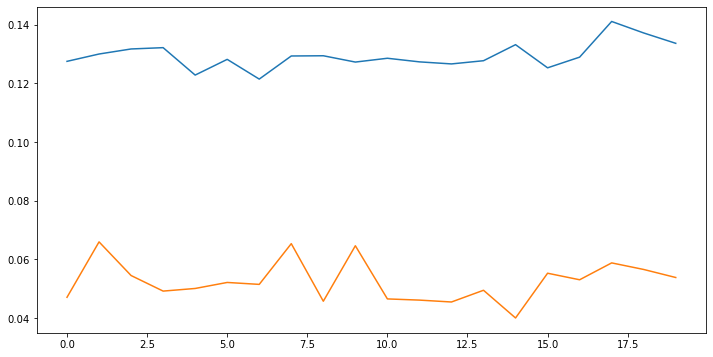

In [313]:
plt.plot(score['loss'])
plt.plot(score['val_loss'])